# CULVERT FILL Analysis GOLD RUN
Michael Baker International.  5/17/2018


In [560]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

# A. Draft mix from James Newberry, 5/16/2018

In [561]:
d = {'size(inches)': [0.38, 0.50, 1.00, 3.00, 12.00], '% finer than': [0, 0.05, 0.15, 0.85, 0.95]}
data=pd.DataFrame(data=d)

# Add percent of total
data['% of total'] = 0
for i in range(len(data)):
    if 4>i>0:
        data['% of total'].iloc[i] = data['% finer than'].iloc[i] - data['% finer than'].iloc[i-1]
    if i==4:
        data['% of total'].iloc[i] = 1 - data['% finer than'].iloc[i]
    else:
        pass

# Arrange columns
cols = ['size(inches)', '% finer than', '% of total']
data = data[cols]

data

,size(inches),% finer than,% of total
0,0.38,0.00,0.00
1,0.50,0.05,0.05
2,1.00,0.15,0.10
3,3.00,0.85,0.70
4,12.00,0.95,0.05


### Plot draft mix distribution

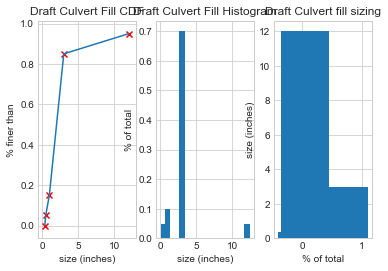

In [663]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3) #, sharey=True)

# Define data for plots
ax1.plot(data['size(inches)'], data['% finer than'])
ax1.scatter(data['size(inches)'], data['% finer than'], marker='x', color='r')
ax1.set_title('Draft Culvert Fill CDF')
ax1.set(xlabel='size (inches)', ylabel='% finer than')

ax2.bar(data['size(inches)'], data['% of total'])
ax2.set_title('Draft Culvert Fill Histogram')
ax2.set(xlabel='size (inches)', ylabel='% of total')

ax3.bar(data['% of total'], data['size(inches)'])
ax3.set_title('Draft Culvert fill sizing')
ax3.set(xlabel='% of total', ylabel='size (inches)')
          
plt.show()

# B. Culvert Data - dimensions, hydraulics

In [564]:
#Culvert ids
c_id = ['p-135', 
        'p-106', 
        'p-136', 
        'p-137', 
        'p-138', 
        'p-107', 
        'p-160', 
        'p-150', 
        'p-152',
        'p-153',
        'p-154',
        'p-139']

# Culvert Slopes
c_slope = [0.1, 
           0.1, 
           0.0679, 
           0.0618, 
           0.0707, 
           0.0536, 
           0.054, 
           0.0751, 
           0.0419,
           0.084,
           0.023,
           0.04]

# Culvert Hydrology (cfs flows)
c_bkfflow  =  [48,  48,  48,  48,  48,  48,  48,  48,  48,  48,  48,  48]
c_10yrflow =  [117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117]
c_25yrflow =  [207, 207, 207, 203, 203, 203, 203, 203, 203, 203, 203, 203]

# Culvert flow top widths
c_bkfwidth  =  [5.9, 8, 7.2, 8, 6.0,  7, 8, 8, 8, 8, 8, 8]
c_10yrwidth =  [6.4, 8, 7.6, 8, 6.34, 7, 8, 8, 8, 8, 8, 8]
c_25yrwidth =  [6.4, 8, 7.6, 8, 6.34, 7, 8, 8, 8, 8, 8, 8]

# Create Dataframe of culvert data
c_data = pd.DataFrame({'culvert id': c_id, 
                       'culvert_slope': c_slope,
                       'bkf flow (cfs)': c_bkfflow,  
                       '10yr flow (cfs)': c_10yrflow,
                       '25yr flow (cfs)': c_25yrflow, 
                       'bkf flow width (ft)': c_bkfwidth,  
                       '10yr flow width (ft)': c_10yrwidth,
                       '25yr flow width (ft)': c_25yrwidth})

# Arrange columns
cols = ['culvert id', 
        'culvert_slope', 
        'bkf flow (cfs)',  
        '10yr flow (cfs)', 
        '25yr flow (cfs)',
        'bkf flow width (ft)',  
        '10yr flow width (ft)',
        '25yr flow width (ft)']
c_data = c_data[cols]

c_data

,culvert id,culvert_slope,bkf flow (cfs),10yr flow (cfs),25yr flow (cfs),bkf flow width (ft),10yr flow width (ft),25yr flow width (ft)
0,p-135,0.1000,48,117,207,5.9,6.40,6.40
1,p-106,0.1000,48,117,207,8.0,8.00,8.00
2,p-136,0.0679,48,117,207,7.2,7.60,7.60
3,p-137,0.0618,48,117,203,8.0,8.00,8.00
4,p-138,0.0707,48,117,203,6.0,6.34,6.34
5,p-107,0.0536,48,117,203,7.0,7.00,7.00
6,p-160,0.0540,48,117,203,8.0,8.00,8.00
7,p-150,0.0751,48,117,203,8.0,8.00,8.00
8,p-152,0.0419,48,117,203,8.0,8.00,8.00
9,p-153,0.0840,48,117,203,8.0,8.00,8.00


# C. Riprap Sizing Calcs

## Material Sizing Method 1:
U.S. Army Corps of Engineers reference, EM 1110-2-1601, Section e., steep slope riprap design (Corps of Engineers. 1994)

### 1a. Add unit discharges to culvert data for 10 and 25 yr events

In [565]:
c_data['bkf unit discharge']  = c_data['bkf flow (cfs)']  /c_data['bkf flow width (ft)']
c_data['10yr unit discharge'] = c_data['10yr flow (cfs)'] /c_data['10yr flow width (ft)']    
c_data['25yr unit discharge'] = c_data['25yr flow (cfs)'] /c_data['25yr flow width (ft)']
    
c_data

,culvert id,culvert_slope,bkf flow (cfs),10yr flow (cfs),25yr flow (cfs),bkf flow width (ft),10yr flow width (ft),25yr flow width (ft),bkf unit discharge,10yr unit discharge,25yr unit discharge
0,p-135,0.1000,48,117,207,5.9,6.40,6.40,8.135593,18.281250,32.343750
1,p-106,0.1000,48,117,207,8.0,8.00,8.00,6.000000,14.625000,25.875000
2,p-136,0.0679,48,117,207,7.2,7.60,7.60,6.666667,15.394737,27.236842
3,p-137,0.0618,48,117,203,8.0,8.00,8.00,6.000000,14.625000,25.375000
4,p-138,0.0707,48,117,203,6.0,6.34,6.34,8.000000,18.454259,32.018927
5,p-107,0.0536,48,117,203,7.0,7.00,7.00,6.857143,16.714286,29.000000
6,p-160,0.0540,48,117,203,8.0,8.00,8.00,6.000000,14.625000,25.375000
7,p-150,0.0751,48,117,203,8.0,8.00,8.00,6.000000,14.625000,25.375000
8,p-152,0.0419,48,117,203,8.0,8.00,8.00,6.000000,14.625000,25.375000
9,p-153,0.0840,48,117,203,8.0,8.00,8.00,6.000000,14.625000,25.375000


### 1b. Compute recommended D30

In [566]:
# Create dataframe to hold results
sizing = pd.DataFrame(c_data['culvert id'])

# Define gravity constant
accel_gravity = 32.174

sizing['USACE_d30_bkf(in)'] = 12*((1.95 * c_data['culvert_slope']**(0.555)) * (1.25 * c_data['bkf unit discharge'])**(2/3) /  accel_gravity**(1/3))
sizing['USACE_d30_10yr(in)'] = 12*((1.95 * c_data['culvert_slope']**(0.555)) * (1.25 * c_data['10yr unit discharge'])**(2/3) /  accel_gravity**(1/3))
sizing['USACE_d30_25yr(in)'] = 12*((1.95 * c_data['culvert_slope']**(0.555)) * (1.25 * c_data['25yr unit discharge'])**(2/3) /  accel_gravity**(1/3))

sizing

,culvert id,USACE_d30_bkf(in),USACE_d30_10yr(in),USACE_d30_25yr(in)
0,p-135,9.621593,16.506618,24.146143
1,p-106,7.853954,14.224972,20.808515
2,p-136,6.796433,11.873810,17.369197
3,p-137,6.012941,10.890556,15.724982
4,p-138,7.848897,13.702917,19.785778
5,p-107,6.073459,11.000165,15.883248
6,p-160,5.579135,10.104852,14.590497
7,p-150,6.699903,12.134771,17.521517
8,p-152,4.846376,8.777689,12.674193
9,p-153,7.129570,12.912979,18.645179


### Creating  material size distribution based on d30:
The U.S. Army Corps of Engineers recommends angular rock with a uniform gradation (D85/D15 =2). This material is not preferred for use in a fish-passage structure (see the section on bed porosity, below). An approximate factor to scale D30 of a uniform riprap gradation for one that is
appropriate for stream channels is 1.5, so that, D84 = 1.5 D30, where D84 is the dimension of the intermediate axis of the 84th percentile particle, and similarly for the 30th percentile.

### 1c. Determine d84

In [567]:
sizing['USACE_d84_bkf(in)'] = 1.5 * sizing['USACE_d30_bkf(in)']
sizing['USACE_d84_10yr(in)'] = 1.5 * sizing['USACE_d30_10yr(in)']
sizing['USACE_d84_25yr(in)'] = 1.5 * sizing['USACE_d30_25yr(in)']

sizing

,culvert id,USACE_d30_bkf(in),USACE_d30_10yr(in),USACE_d30_25yr(in),USACE_d84_bkf(in),USACE_d84_10yr(in),USACE_d84_25yr(in)
0,p-135,9.621593,16.506618,24.146143,14.432390,24.759927,36.219214
1,p-106,7.853954,14.224972,20.808515,11.780931,21.337458,31.212772
2,p-136,6.796433,11.873810,17.369197,10.194650,17.810715,26.053795
3,p-137,6.012941,10.890556,15.724982,9.019412,16.335833,23.587473
4,p-138,7.848897,13.702917,19.785778,11.773345,20.554375,29.678668
5,p-107,6.073459,11.000165,15.883248,9.110188,16.500247,23.824871
6,p-160,5.579135,10.104852,14.590497,8.368703,15.157278,21.885745
7,p-150,6.699903,12.134771,17.521517,10.049854,18.202157,26.282276
8,p-152,4.846376,8.777689,12.674193,7.269564,13.166534,19.011290
9,p-153,7.129570,12.912979,18.645179,10.694355,19.369468,27.967768


## Material Sizing Method 2:
CSU Equation, Development of Riprap Design Criteria by Riprap Testing in Flumes: Phase II
(prepared by S.R. Abt, et al, Colorado State University, 1988). This method was developed for steep
slopes from 2 to 20 percent. 

### 2a.  Determine the design unit discharge (eqn 7.1)
q' = q * Cf  
Where Cf = 1.0 for overland sheet flow,  
      Cf = 2.0 for a high probability of concentrated flow, and  
      Cf = 3.0 for a high probability of channelized flow 
      
For culvert fill, assume channelized flow - Cf=3.0

In [568]:
# Create a new dataframe to hold steps of CSU method
csu = pd.DataFrame()

csu['CSU_bkf_qprime'] = 3.0 * c_data['bkf unit discharge']
csu['CSU_10yr_qprime'] = 3.0 * c_data['10yr unit discharge']
csu['CSU_25yr_qprime'] = 3.0 * c_data['25yr unit discharge']

csu

,CSU_bkf_qprime,CSU_10yr_qprime,CSU_25yr_qprime
0,24.406780,54.843750,97.031250
1,18.000000,43.875000,77.625000
2,20.000000,46.184211,81.710526
3,18.000000,43.875000,76.125000
4,24.000000,55.362776,96.056782
5,20.571429,50.142857,87.000000
6,18.000000,43.875000,76.125000
7,18.000000,43.875000,76.125000
8,18.000000,43.875000,76.125000
9,18.000000,43.875000,76.125000


### 2b. Estimate the median stone size (d50) of the riprap layer (eqn 7.2)
To size the median stone and prevent stone movement, adjust the design unit discharge by   
q** = 1.35 * q' 

In [569]:
csu['CSU_bkf_qstar'] = 1.35 * csu['CSU_bkf_qprime']
csu['CSU_10yr_qstar'] = 1.35 * csu['CSU_10yr_qprime']
csu['CSU_25yr_qstar'] = 1.35 * csu['CSU_25yr_qprime']

csu

,CSU_bkf_qprime,CSU_10yr_qprime,CSU_25yr_qprime,CSU_bkf_qstar,CSU_10yr_qstar,CSU_25yr_qstar
0,24.406780,54.843750,97.031250,32.949153,74.039062,130.992188
1,18.000000,43.875000,77.625000,24.300000,59.231250,104.793750
2,20.000000,46.184211,81.710526,27.000000,62.348684,110.309211
3,18.000000,43.875000,76.125000,24.300000,59.231250,102.768750
4,24.000000,55.362776,96.056782,32.400000,74.739748,129.676656
5,20.571429,50.142857,87.000000,27.771429,67.692857,117.450000
6,18.000000,43.875000,76.125000,24.300000,59.231250,102.768750
7,18.000000,43.875000,76.125000,24.300000,59.231250,102.768750
8,18.000000,43.875000,76.125000,24.300000,59.231250,102.768750
9,18.000000,43.875000,76.125000,24.300000,59.231250,102.768750


### 2c. Determine d50 for angular stone (eqn 7.3)
d50 = 5.23 * slope^(0.43) * q*^(0.53)

In [570]:
csu['CSU_d50_bkf(in)'] = 5.23  * c_data['culvert_slope']**(0.43) * csu['CSU_bkf_qstar']**(0.53)
csu['CSU_d50_10yr(in)'] = 5.23  * c_data['culvert_slope']**(0.43) * csu['CSU_10yr_qstar']**(0.53)
csu['CSU_d50_25yr(in)'] = 5.23  * c_data['culvert_slope']**(0.43) * csu['CSU_25yr_qstar']**(0.53)

csu

,CSU_bkf_qprime,CSU_10yr_qprime,CSU_25yr_qprime,CSU_bkf_qstar,CSU_10yr_qstar,CSU_25yr_qstar,CSU_d50_bkf(in),CSU_d50_10yr(in),CSU_d50_25yr(in)
0,24.406780,54.843750,97.031250,32.949153,74.039062,130.992188,12.386800,19.024619,25.741968
1,18.000000,43.875000,77.625000,24.300000,59.231250,104.793750,10.540786,16.902606,22.870699
2,20.000000,46.184211,81.710526,27.000000,62.348684,110.309211,9.436881,14.704970,19.897107
3,18.000000,43.875000,76.125000,24.300000,59.231250,102.768750,8.570340,13.742910,18.404037
4,24.000000,55.362776,96.056782,32.400000,74.739748,129.676656,10.576474,16.471547,22.058135
5,20.571429,50.142857,87.000000,27.771429,67.692857,117.450000,8.652659,13.874913,18.580810
6,18.000000,43.875000,76.125000,24.300000,59.231250,102.768750,8.087277,12.968298,17.366703
7,18.000000,43.875000,76.125000,24.300000,59.231250,102.768750,9.319620,14.944412,20.013048
8,18.000000,43.875000,76.125000,24.300000,59.231250,102.768750,7.251453,11.628018,15.571846
9,18.000000,43.875000,76.125000,24.300000,59.231250,102.768750,9.779420,15.681722,21.000428


In [571]:
# Add results to sizing dataframe
sizing['CSU_d50_bkf(in)'] = csu['CSU_d50_bkf(in)']
sizing['CSU_d50_10yr(in)'] = csu['CSU_d50_10yr(in)']
sizing['CSU_d50_25yr(in)'] = csu['CSU_d50_25yr(in)']

sizing

,culvert id,USACE_d30_bkf(in),USACE_d30_10yr(in),USACE_d30_25yr(in),USACE_d84_bkf(in),USACE_d84_10yr(in),USACE_d84_25yr(in),CSU_d50_bkf(in),CSU_d50_10yr(in),CSU_d50_25yr(in)
0,p-135,9.621593,16.506618,24.146143,14.432390,24.759927,36.219214,12.386800,19.024619,25.741968
1,p-106,7.853954,14.224972,20.808515,11.780931,21.337458,31.212772,10.540786,16.902606,22.870699
2,p-136,6.796433,11.873810,17.369197,10.194650,17.810715,26.053795,9.436881,14.704970,19.897107
3,p-137,6.012941,10.890556,15.724982,9.019412,16.335833,23.587473,8.570340,13.742910,18.404037
4,p-138,7.848897,13.702917,19.785778,11.773345,20.554375,29.678668,10.576474,16.471547,22.058135
5,p-107,6.073459,11.000165,15.883248,9.110188,16.500247,23.824871,8.652659,13.874913,18.580810
6,p-160,5.579135,10.104852,14.590497,8.368703,15.157278,21.885745,8.087277,12.968298,17.366703
7,p-150,6.699903,12.134771,17.521517,10.049854,18.202157,26.282276,9.319620,14.944412,20.013048
8,p-152,4.846376,8.777689,12.674193,7.269564,13.166534,19.011290,7.251453,11.628018,15.571846
9,p-153,7.129570,12.912979,18.645179,10.694355,19.369468,27.967768,9.779420,15.681722,21.000428


## Material sizing method 3: Traditional ratios
From U.S. Army Corps of Engineers reference, EM 1110-2-1601, Section e., steep slope riprap design (Corps of Engineers. 1994), section 3-6

Some designers prefer to use the traditional D50 in riprap design. The approximate relationship  between D50 and D30 is D50 = D30 (D85/D15)^1/3. 

Rearrange to d15 = d85 / (d50/d30)^3

Note: working outside of suggested slope limits: Equation 3-3 can be
used with either SI (metric) or non-SI units and should be
limited to slopes less than 2 percent.

### 3a. Sizing d15

In [572]:
# Bankfull d15
sizing['USACE_d15_bkf(in)'] = sizing['USACE_d84_bkf(in)'] / ((sizing['CSU_d50_bkf(in)'] / sizing['USACE_d30_bkf(in)'])**3) 

# 10yr d15
sizing['USACE_d15_10yr(in)'] = sizing['USACE_d84_10yr(in)'] / ((sizing['CSU_d50_10yr(in)'] / sizing['USACE_d30_10yr(in)'])**3) 

# 25yr d15
sizing['USACE_d15_25yr(in)'] = sizing['USACE_d84_25yr(in)'] / ((sizing['CSU_d50_25yr(in)'] / sizing['USACE_d30_25yr(in)'])**3) 

sizing

,culvert id,USACE_d30_bkf(in),USACE_d30_10yr(in),USACE_d30_25yr(in),USACE_d84_bkf(in),USACE_d84_10yr(in),USACE_d84_25yr(in),CSU_d50_bkf(in),CSU_d50_10yr(in),CSU_d50_25yr(in),USACE_d15_bkf(in),USACE_d15_10yr(in),USACE_d15_25yr(in)
0,p-135,9.621593,16.506618,24.146143,14.432390,24.759927,36.219214,12.386800,19.024619,25.741968,6.763972,16.172448,29.892144
1,p-106,7.853954,14.224972,20.808515,11.780931,21.337458,31.212772,10.540786,16.902606,22.870699,4.873328,12.718503,23.508086
2,p-136,6.796433,11.873810,17.369197,10.194650,17.810715,26.053795,9.436881,14.704970,19.897107,3.808290,9.376897,17.331670
3,p-137,6.012941,10.890556,15.724982,9.019412,16.335833,23.587473,8.570340,13.742910,18.404037,3.114906,8.129340,14.713384
4,p-138,7.848897,13.702917,19.785778,11.773345,20.554375,29.678668,10.576474,16.471547,22.058135,4.811750,11.834234,21.418914
5,p-107,6.073459,11.000165,15.883248,9.110188,16.500247,23.824871,8.652659,13.874913,18.580810,3.150553,8.222374,14.881768
6,p-160,5.579135,10.104852,14.590497,8.368703,15.157278,21.885745,8.087277,12.968298,17.366703,2.747589,7.170710,12.978350
7,p-150,6.699903,12.134771,17.521517,10.049854,18.202157,26.282276,9.319620,14.944412,20.013048,3.733969,9.744984,17.637556
8,p-152,4.846376,8.777689,12.674193,7.269564,13.166534,19.011290,7.251453,11.628018,15.571846,2.170124,5.663632,10.250672
9,p-153,7.129570,12.912979,18.645179,10.694355,19.369468,27.967768,9.779420,15.681722,21.000428,4.143863,10.814731,19.573704


# D. Comparing Results
## Reshaping for plotting

In [573]:
# Clean up each flow rate data
sizing_bkf = pd.DataFrame({'d15': sizing.loc[:,'USACE_d15_bkf(in)'],  
                           'd30': sizing.loc[:,'USACE_d30_bkf(in)'],  
                           'd50': sizing.loc[:,'CSU_d50_bkf(in)'],
                           'd84': sizing.loc[:,'USACE_d84_bkf(in)'],  
                           'flow': 'bankfull'
                          })

sizing_10yr = pd.DataFrame({'d15': sizing.loc[:,'USACE_d15_10yr(in)'],  
                           'd30': sizing.loc[:,'USACE_d30_10yr(in)'],  
                           'd50': sizing.loc[:,'CSU_d50_10yr(in)'],
                           'd84': sizing.loc[:,'USACE_d84_10yr(in)'],  
                            'flow': '10yr'
                          })

sizing_25yr = pd.DataFrame({'d15': sizing.loc[:,'USACE_d15_25yr(in)'],  
                           'd30': sizing.loc[:,'USACE_d30_25yr(in)'],  
                           'd50': sizing.loc[:,'CSU_d50_25yr(in)'],
                           'd84': sizing.loc[:,'USACE_d84_25yr(in)'],  
                            'flow': '25yr'
                          })

# Reconcatenate into single dataframe
frames = [sizing_bkf, sizing_10yr, sizing_25yr]
riprap = pd.concat(frames)

# Reset index to flow
riprap = riprap.set_index('flow')
riprap['flow'] = riprap.index


riprap


,d15,d30,d50,d84,flow
flow,,,,,
bankfull,6.763972,9.621593,12.386800,14.432390,bankfull
bankfull,4.873328,7.853954,10.540786,11.780931,bankfull
bankfull,3.808290,6.796433,9.436881,10.194650,bankfull
bankfull,3.114906,6.012941,8.570340,9.019412,bankfull
bankfull,4.811750,7.848897,10.576474,11.773345,bankfull
bankfull,3.150553,6.073459,8.652659,9.110188,bankfull
bankfull,2.747589,5.579135,8.087277,8.368703,bankfull
bankfull,3.733969,6.699903,9.319620,10.049854,bankfull
bankfull,2.170124,4.846376,7.251453,7.269564,bankfull


In [581]:
# Create new dataframe with basic stats
riprap_desc_bkf = riprap.loc['bankfull',:].describe()
riprap_desc_10yr = riprap.loc['10yr',:].describe()
riprap_desc_25yr = riprap.loc['25yr',:].describe()

riprap_desc_bkf

,d15,d30,d50,d84
count,12.000000,12.000000,12.000000,12.000000
mean,3.553260,6.388296,8.942736,9.582444
std,1.492818,1.653816,1.821727,2.480724
min,1.242317,3.474140,5.602940,5.211210
25%,2.603223,5.395945,7.878321,8.093918
50%,3.442261,6.386681,8.986139,9.580021
75%,4.310834,7.309402,9.969762,10.964103
max,6.763972,9.621593,12.386800,14.432390


In [607]:
mean_bkf = pd.DataFrame(riprap_desc_bkf.loc['mean',:])
mean_10yr = pd.DataFrame(riprap_desc_10yr.loc['mean',:])
mean_25yr = pd.DataFrame(riprap_desc_25yr.loc['mean',:])

mean_bkf

,mean
d15,3.553260
d30,6.388296
d50,8.942736
d84,9.582444


## Plotting design mix

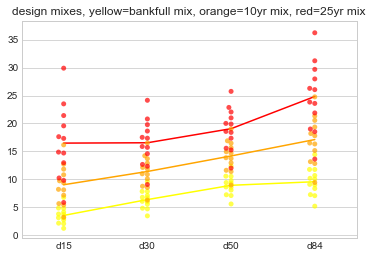

In [664]:
import seaborn as sns

color = ['red', 'blue', 'green', 'yellow']
sns.swarmplot(data=riprap.loc['bankfull',:], color='yellow',alpha=.7)
sns.swarmplot(data=riprap.loc['10yr',:], color='orange', alpha = .7)
sns.swarmplot(data=riprap.loc['25yr',:], color='red', alpha = .7)

plt.plot(mean_bkf, color='yellow')
plt.plot(mean_10yr, color='orange')
plt.plot(mean_25yr, color='red')
plt.title('design mixes, yellow=bankfull mix, orange=10yr mix, red=25yr mix')
plt.show()

# plt.show()

# E. Determining average depth for culvert fill
Using calculated riprap sizing distributions to ensure average fill depth is less than or equal to 6" for hydraulic capacity

In [665]:
filldepth_bkf = mean_bkf.copy()

# Add column of percentiles
filldepth_bkf['pct'] = [15,30,50,84]

# Add percent of total
filldepth_bkf['% of total'] = 0

# Fill % of total
for i in range(len(filldepth_bkf)):
    if i == 0:
        filldepth_bkf['% of total'].iloc[i] = filldepth_bkf['pct'].iloc[i] - 0
    if 4>i>0:
        filldepth_bkf['% of total'].iloc[i] = filldepth_bkf['pct'].iloc[i] - filldepth_bkf['pct'].iloc[i-1]
    if i==4:
        filldepth_bkf['% of total'].iloc[i] = 100 - (filldepth_bkf['pct'].iloc[i])

filldepth_bkf['weighted_depth'] = filldepth_bkf['mean'] * (filldepth_bkf['% of total']/100)
        
filldepth_bkf

,mean,pct,% of total,weighted_depth
d15,3.553260,15,15,0.532989
d30,6.388296,30,15,0.958244
d50,8.942736,50,20,1.788547
d84,9.582444,84,34,3.258031


In [662]:
print ('Average fill depth for bankfull flow mix: %2f inches' % (filldepth_bkf['weighted_depth'].sum()))

Average fill depth for bankfull flow mix: 6.537812 inches
